# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import scipy.stats as stats
from sklearn.utils import resample

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(adultDataSet_filename)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**1.** I chose the "census" data set.

**2.** I'll predict the level of education for an example. I’ve decided to categorize the education levels into four broader groups: Elementary Education, Middle-Some High School, High School-Pre Academic, and Academic Education.

**3.** This is a supervised ML problem since the goal is to predict a label based on input features. Specifically, it is a multi-class classification problem because the task is to categorize each individual into one of several (four) education levels.

**4.** As for right now, all of the columns be will considered as features ('age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_binary'), however, as I expore the data, I might drop irrelevent features.

**5.** Predicting the level of education can provide valuable insights for companies. For iexample, a company that offers online courses can use this information to tailor their course offerings to match the educational background of their users. This allows for the creation of more relevant and targeted educational content, potentially increasing user engagement and satisfaction. Also, understanding the educational background of customers can help companies design better products, marketing strategies, and customer support services that align with audience's needs and skills.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### <u>Inspecting the data</u>

In [3]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(32561, 15)
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States   

### <u>Transforming the label</u>

In [4]:
group_mapping = {
    'Preschool': 'Elemntry Education',
    '1st-4th': 'Elemntry Education',
    '5th-6th': 'Elemntry Education',
    '7th-8th': 'Middle-Some High School',
    '9th': 'Middle-Some High School',
    '10th': 'Middle-Some High School',
    '11th': 'Middle-Some High School',
    '12th': 'Middle-Some High School',
    'HS-grad': 'High School-Pre Academic',
    'Prof-school': 'High School-Pre Academic' ,
    'Assoc-acdm': 'High School-Pre Academic', 
    'Assoc-voc':'High School-Pre Academic',
    'Some-college':'High School-Pre Academic',
    'Bachelors': 'Academic Education', 
    'Masters': 'Academic Education', 
    'Doctorate': 'Academic Education'
}

df['education'] = df['education'].replace(group_mapping)

#To numerical
edu = ['Elemntry Education','Middle-Some High School','High School-Pre Academic', 'Academic Education']
edu_mapping = {edu: i for i, edu in enumerate(edu)}
df['education_group'] = df['education'].map(edu_mapping)

### <u>Checking the label distribution</u>
**Was added retrospective, more on it at the bottom of the notebook.**

2    20817
3     7491
1     3701
0      552
Name: education_group, dtype: int64


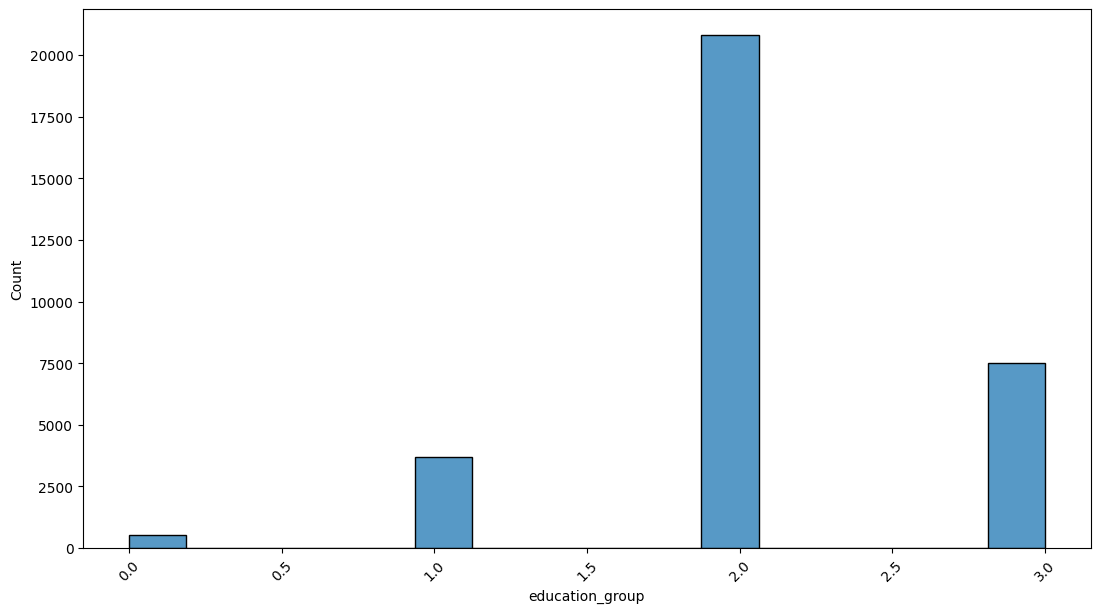

In [5]:
class_distribution = pd.Series(df['education_group']).value_counts()
print(class_distribution)

figure = plt.figure(figsize=(13,7))
ax = sns.histplot(data=df, x=df['education_group'])
t1 = plt.xticks(rotation=45)

**Here, I noticed the inbalance in the label. As I wrote next to the title, more on this, at the bottom of the assigment.**

### <u>Finding missing values</u>

In [6]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                 162
workclass          1836
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex_selfID            0
capital-gain          0
capital-loss          0
hours-per-week      325
native-country      583
income_binary         0
education_group       0
dtype: int64

### <u>Handeling missing values</u>

In [7]:
#Numerical values (type is baesd on describe method above). Replacing them with the mean.
mean_ages=df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)

mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours,inplace=True)

In [8]:
#Categorial missing values 
#Occupation - since the large number of missing values, we are dropping the rows with the missing values.
df.dropna(subset=['occupation'], inplace=True)

#native-country - Replacing the missing values with the most common value in the column
most_common_val = df['native-country'].value_counts().idxmax() # United-States
df['native-country'].fillna(value=most_common_val, inplace=True)
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [9]:
nan_count = np.sum(df.isnull(), axis = 0) #Rechecking that we don't have missing vals
nan_count 

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex_selfID         0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_binary      0
education_group    0
dtype: int64

### <u>Numerical feature manipulation (Feature engineering)</u>

### <u>Looking for outliers</u>

In [10]:
feature_df = df.drop(['education', 'education_group'], axis=1)
feature_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [11]:
num_df = feature_df.select_dtypes(include=['int64', 'float64'])
feature_of_num = list(num_df.columns)
df_zscores = num_df.apply(stats.zscore)
outliers = abs(df_zscores) > 3 

#Count outliers in each column
outlier_counts = outliers.sum()
outlier_counts

age                122
fnlwgt             332
education-num      202
capital-gain       822
capital-loss      1415
hours-per-week     446
dtype: int64

In [12]:
#Dropped capital-gain capital-loss because of their large number of outliers  
df['age-win'] = stats.mstats.winsorize(df['age'], limits=[0.01, 0.01])
df['fnlwgt-win'] = stats.mstats.winsorize(df['fnlwgt'], limits=[0.01, 0.01])
df['education-num-win'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
df['hours-per-week-win'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])

### <u>Looking for correlation with the label</u>

In [13]:
corr_matrix = df.corr(method='spearman')
education_group_corr = corr_matrix['education_group']
sorted_corr = education_group_corr.sort_values()
sorted_corr

fnlwgt               -0.036718
fnlwgt-win           -0.036714
capital-loss          0.067022
age-win               0.083448
age                   0.083460
capital-gain          0.102648
hours-per-week        0.172777
hours-per-week-win    0.172813
education-num         0.847400
education-num-win     0.847402
education_group       1.000000
Name: education_group, dtype: float64

Here I can see that the 2 most influencal numerical features are 'education-num-win' and 'hours-per-week-win' which I'm going to use for my model

### <u>Categorial feature analysis</u>

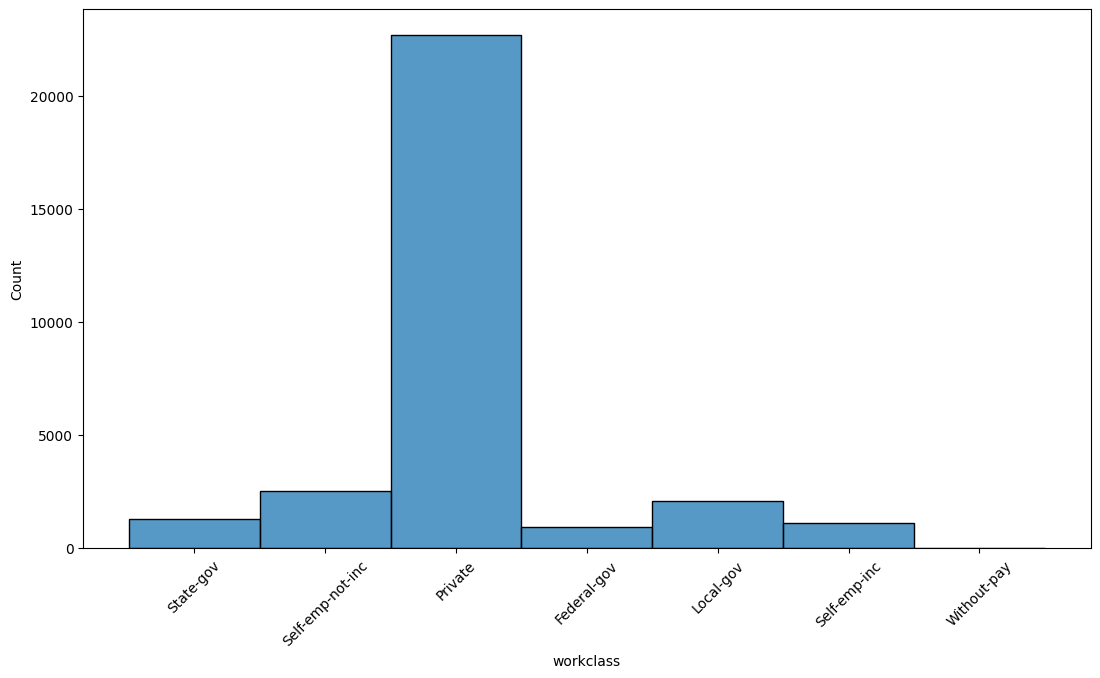

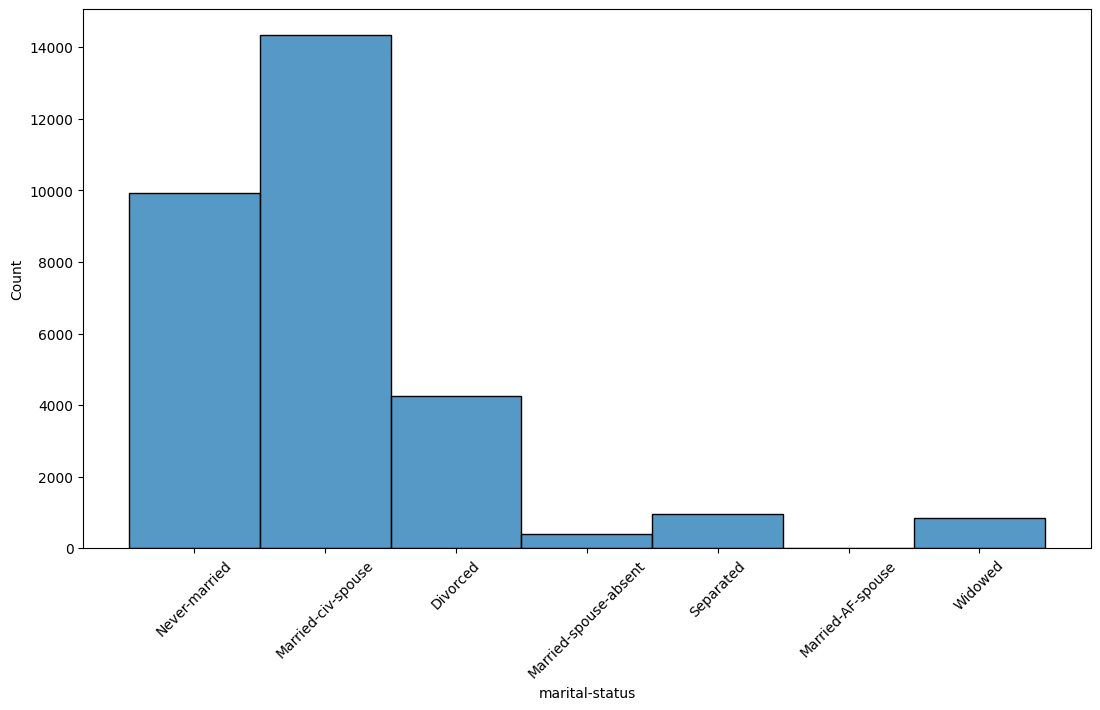

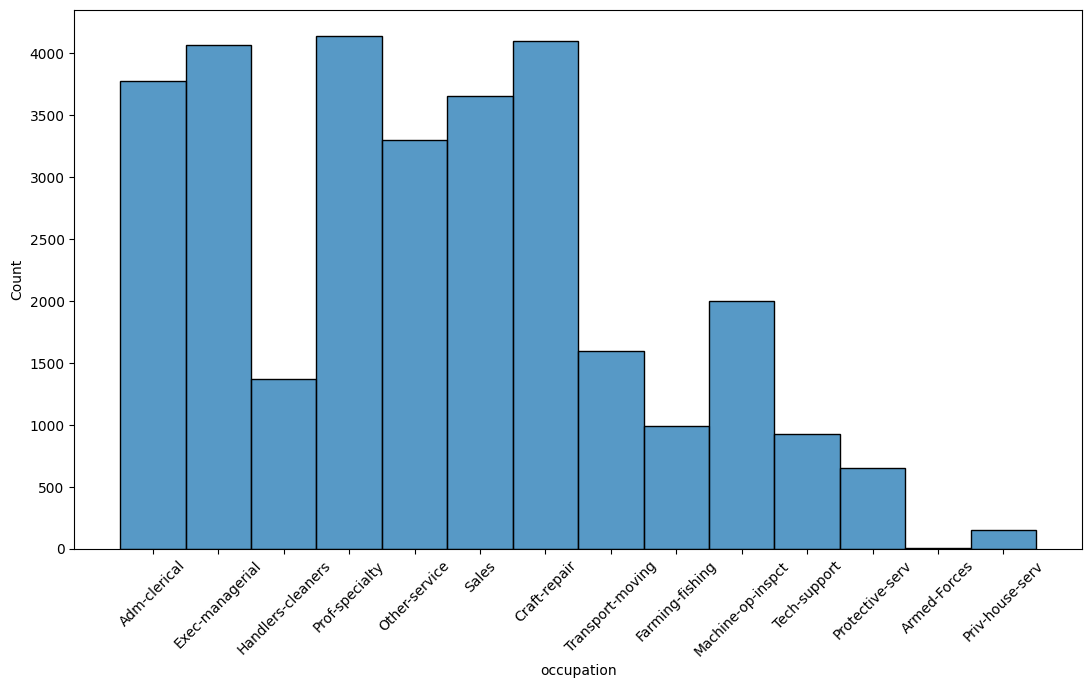

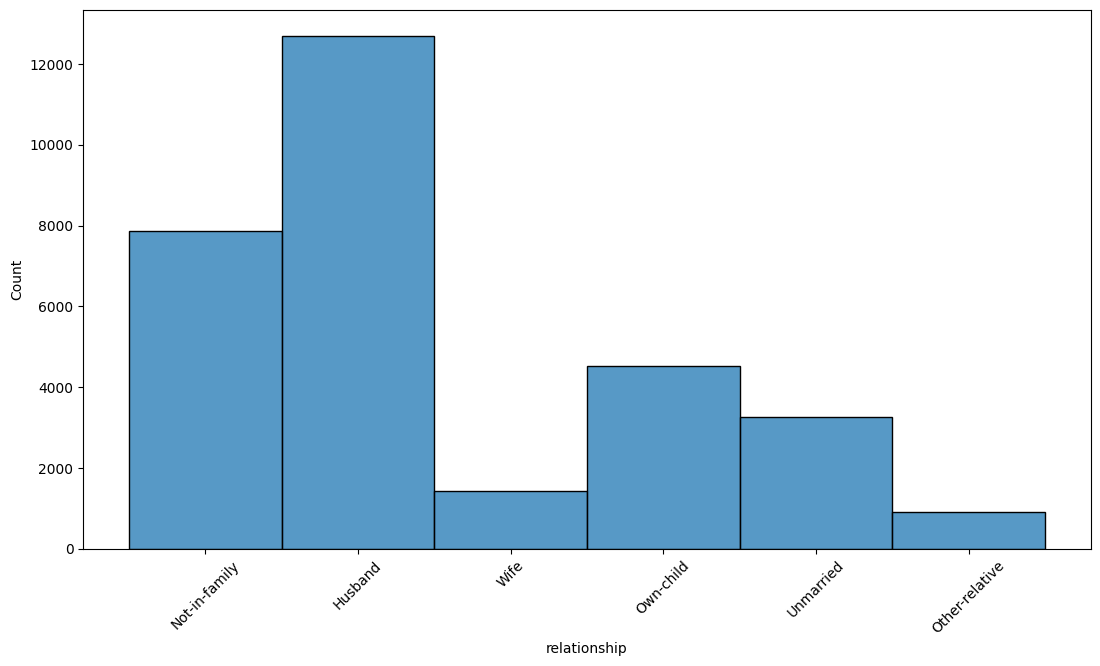

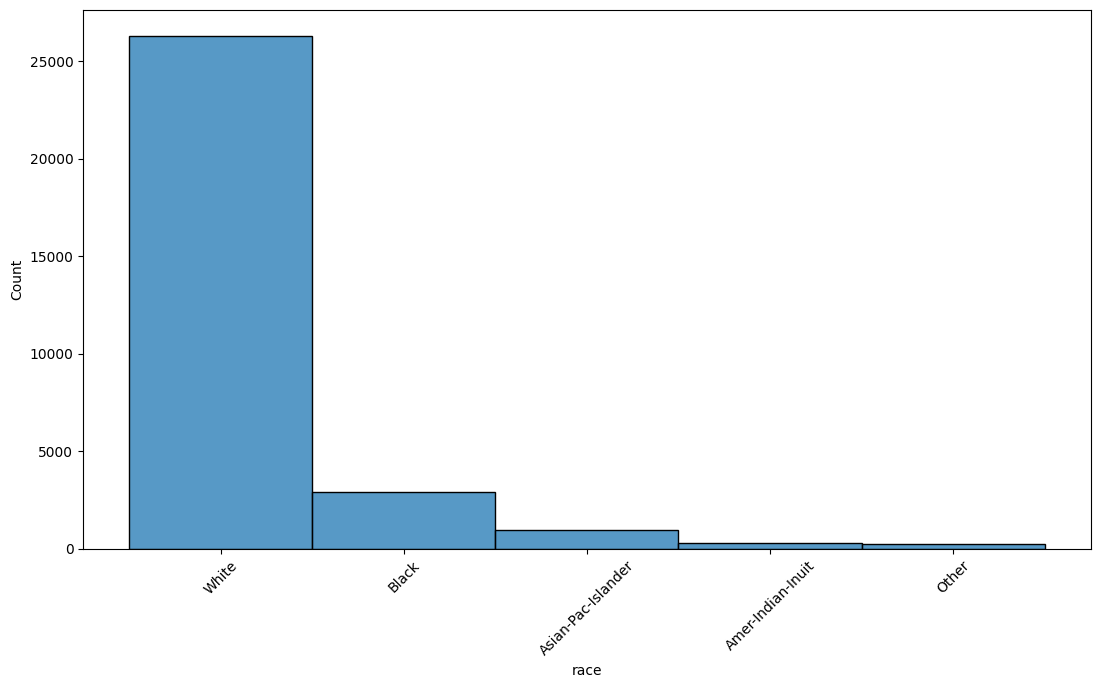

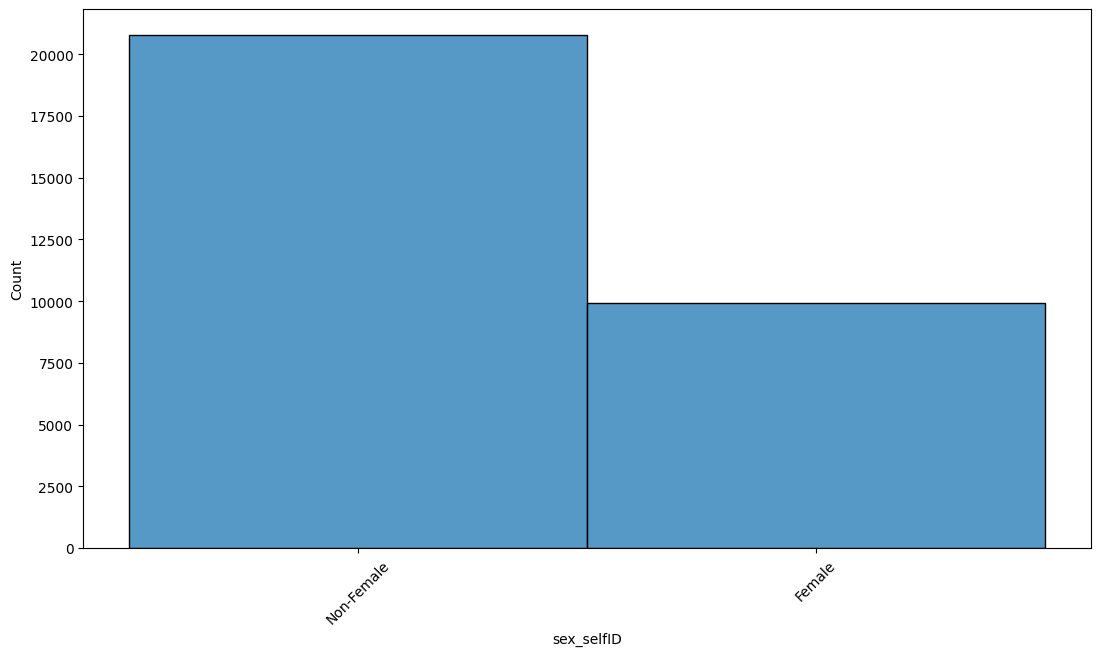

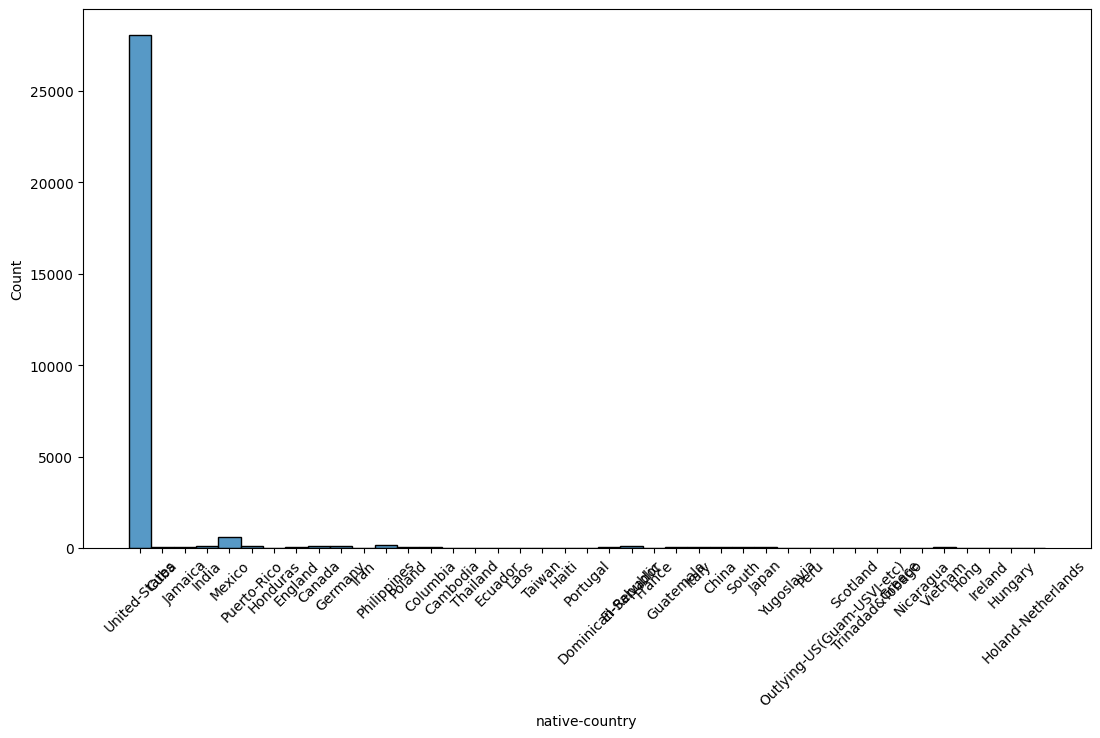

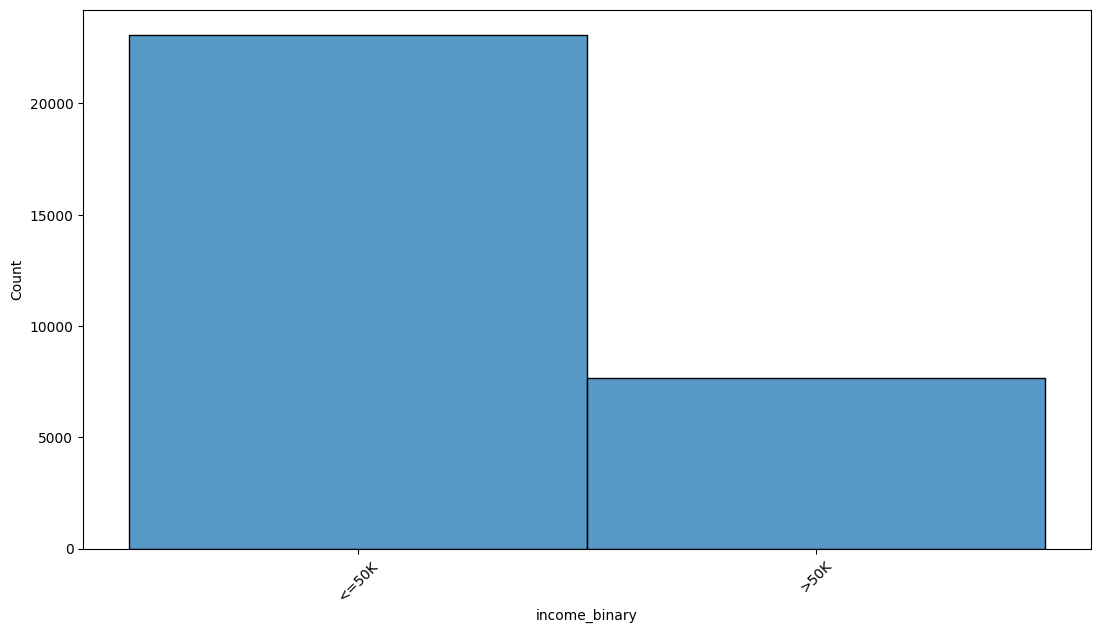

In [14]:
categorial_features = feature_df.select_dtypes(include=['object'])
for feature in list(categorial_features):
    fig1 = plt.figure(figsize=(13,7))
    ax = sns.histplot(data=df, x=feature)
    t1 = plt.xticks(rotation=45)

### <u>Categorial feature manipulation (feature engineering)</u>
After visualising the categorial data (considering stuff such as distrobutions, fairness, bais, number of unique values, redundecy, outliers etc.), I chose to focus on these features: occupation, workclass, relationship, sex_selfID and income_binary

In [15]:
df_temp = df.copy()
df_final = df_temp[['occupation', 'relationship', 'workclass', 'sex_selfID', 'income_binary', 'education-num-win', 'hours-per-week-win', 'education_group']]

#occupation one encoded
df_occupation = pd.get_dummies(df['occupation'], prefix='occupation_')
df_final = df_final.join(df_occupation)
df_final.drop(columns = 'occupation', inplace=True)

#relationship one encoded
df_relationship = pd.get_dummies(df['relationship'], prefix='relationship_')
df_final = df_final.join(df_relationship)
df_final.drop(columns = 'relationship', inplace=True)

#workclass group & one encoded
columns_not_self_employed = ~(df_final['workclass'] == 'Self-emp-not-inc') & ~(df_final['workclass'] == 'Self-emp-inc')
df_final['workclass'] = np.where(columns_not_self_employed, 'Not-self-emp', df_final['workclass'])
condition = (df_final['workclass'] == 'Self-emp-not-inc') | (df_final['workclass'] == 'Self-emp-inc')
df_final['workclass'] = np.where(condition, 'Self-emp', df_final['workclass'])

df_workclass = pd.get_dummies(df_final['workclass'], prefix='workclass_')
df_final = df_final.join(df_workclass)
df_final.drop(columns = 'workclass', inplace=True)

#sex_selfID - binary variable
sex_condition1 = (df_final['sex_selfID'] == 'Female')
df_final['sex_selfID'] = np.where(sex_condition1, True, df_final['sex_selfID'])

sex_condition2 = (df_final['sex_selfID'] != 'Female')
df_final['sex_selfID'] = np.where(sex_condition2, False, df_final['sex_selfID'])

#sex_selfID - binary variable
income_condition1 = (df_final['income_binary'] == '>50K')
df_final['income_binary'] = np.where(income_condition1, True, df_final['income_binary'])

income_condition2 = (df['income_binary'] == '<=50K')
df_final['income_binary'] = np.where(income_condition2, False, df_final['income_binary'])

### <u>Checking the final dataset</u>

In [16]:
print(df_final.columns)
print(df_final.shape)

Index(['sex_selfID', 'income_binary', 'education-num-win',
       'hours-per-week-win', 'education_group', 'occupation__Adm-clerical',
       'occupation__Armed-Forces', 'occupation__Craft-repair',
       'occupation__Exec-managerial', 'occupation__Farming-fishing',
       'occupation__Handlers-cleaners', 'occupation__Machine-op-inspct',
       'occupation__Other-service', 'occupation__Priv-house-serv',
       'occupation__Prof-specialty', 'occupation__Protective-serv',
       'occupation__Sales', 'occupation__Tech-support',
       'occupation__Transport-moving', 'relationship__Husband',
       'relationship__Not-in-family', 'relationship__Other-relative',
       'relationship__Own-child', 'relationship__Unmarried',
       'relationship__Wife', 'workclass__Not-self-emp', 'workclass__Self-emp'],
      dtype='object')
(30718, 27)


## Part 4: Define Your Project Plan 

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

**1+2.**
In the data preparation, I've divided my features into numerical and categorical. For numerical features, I looked for outliers. The features 'capital-gain' and 'capital-loss' had a large number of outliers, I've decided to drop them and Winsorized the other features to reduce the influence of extreme values. To determine which numerical features to keep, I checked their correlation with the target feature. The highest correlated features were 'education-num-win' and 'hours-per-week-win', which I decided to keep.

For categorical features, I plotted a histogram for each feature to check distributions, bias, number of unique values, and outliers. I also considered redundancy, such as between 'relationship' vs. 'marital-status'. Fairness was another consideration: I decided not to include race and country despite their potential importance to avoid unfair representation, as their plots showed an unfair representation of certain groups. Eventually, I chose the features 'occupation', 'workclass', 'relationship', 'sex_selfID', and 'income_binary'.

**3+4**
For my model, I chose Random Forest as my multiclass classifier. I performed hyperparameter tuning using Grid Search to find the best parameters. After identifying the optimal hyperparameters, I used the best model for predictions. Since it's a classification problem, I will evaluate my model using accuracy, precision, and recall calculations, as well as a confusion matrix. For future use, I plan to deploy my model. Considering my use case involves potential consumers, I would likely choose online inference as the deployment method for real-time results. Since my model involves personal information, I would opt for internal hosting environment. While, of course, monitoring for issues that may arise, such as performance, bias, security, and cost revisions.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### <u>Preparing the data</u>

In [18]:
y = df_final['education_group']
X = df_final.drop(columns = 'education_group', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

#normilzaing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(21502, 26)
(9216, 26)


### <u>Finding the best hyperparameters</u>

In [19]:
rf_param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [1, 2, 4]
}

#Initilazing the models
rf_model = RandomForestClassifier(criterion='entropy')

#Grid search
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Get the best models
best_rf_model = rf_grid_search.best_params_

print(best_rf_model)

{'max_depth': 4, 'n_estimators': 100}


### <u>Evaluation of the model</u>

In [20]:
#Initilazing the best model
rf_model_best = RandomForestClassifier(max_depth=rf_grid_search.best_estimator_.max_depth, n_estimators=rf_grid_search.best_estimator_.n_estimators)

#fitting
rf_model_best.fit(X_train, y_train)

#predicting
y_rf_pred = rf_model_best.predict(X_test)

In [21]:
#Calculating scores - an error arises due to outdate version (in previous assignments, it was approved)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred, average='weighted')
rf_recall = recall_score(y_test, y_rf_pred, average='weighted')

print('Accuracy:', rf_accuracy)
print('Precision:', rf_precision)
print('Recall:', rf_recall)

Accuracy: 0.8600260416666666
Precision: 0.7559971207208679
Recall: 0.8600260416666666


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
#Confustion metrix
c_m = confusion_matrix(y_test, y_rf_pred, labels=[0, 1, 2, 3])

pd.DataFrame(
c_m,
columns=['Predicted: Elementary Education (0)', 'Predicted: Middle-Some High School (1)', 'Predicted: High School-Pre Academic (2)', 'Predicted: Academic Education (3)'],
index=['Accutal: Elementary Education (0)', 'Accutal: Middle-Some High School (1)', 'Accutal: High School-Pre Academic (2)', 'Accutal: Academic Education (3)']
)


,Predicted: Elementary Education (0),Predicted: Middle-Some High School (1),Predicted: High School-Pre Academic (2),Predicted: Academic Education (3)
Accutal: Elementary Education (0),0,0,146,0
Accutal: Middle-Some High School (1),0,0,984,0
Accutal: High School-Pre Academic (2),0,0,5697,160
Accutal: Academic Education (3),0,0,0,2229


### <u> Analizing the scores</u>
My model has a really good scores (especially Accuracy, Precision and Recall), however, when looking at the confustion metrix, it suffers from imblance of the label, which created unfairness between the bigger classes in the features and the smaller ones  (which I expand more about in the additional part below).

# ________________________________________

## **Additional Considerations I Had Throughout the Assignment**

### When I completed the assignment, I wasn't satisfied with the results. I'm adding this section to provide extra analysis I conducted during the completion of this assignment, as well as solutions for issues I encountered along the way.

### <u>Imbalance of the label</u>

When completing the form about the assignment, I wasn't sure which label I wanted to predict. Looking at the other assignments with the same dataset, I wanted to choose a label that hadn't been used before, especially multiclass classification, which we hadn't done before. When I first glanced over the dataset, 'education' seemed like the perfect candidate.

Naively, since 'education' has a large number of classes, I grouped them into larger categories: 'Elementary Education', 'Middle-Some High School', 'High School-Pre Academic', and 'Academic Education'. This created a significant imbalance in my data (see the histogram and count in the code in part 3). After researching online, I tried multiple ways to balance it. First, I tried using the library, imbalanced-learn, which provides multiple methods for balancing. However, I got an error that the library wasn't installed. Then I did it manually as written below:

Which worked; however, each time I ran it (regardless of whether I chose to upscale or downscale), a memory error occurred. I'm not sure what caused this error, since I explicitly did this in place (replacing the previous column). This means that even when downscaling, which decreases the dataset, I still got the error.

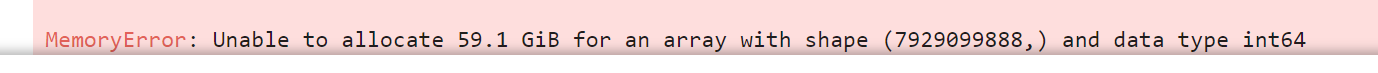

Eventually, after a long time trying to figure out what was going on, I decided to stick with the label (which now I regret :) ).

Looking at my confusion matrix, the imbalance is extremely noticeable, with most true positives in groups 'High School-Pre Academic' and High School-Pre Academic' (the largest groups in the dataset). For the smallest groups, the model ignored them entirely.

If I had the option to change it, I would definitely reevaluate my label, either by finding a better label for the dataset or finding a more suitable way to present it. I would also try to find more ways to balance it that the notebook would support.

### <u>Evaluation and compartion of multiple different model</u>

In my model selection, I tried to implement a comparison between Random Forest (RF) and Gradient Boosting Decision Tree (GBDT). For each model, I performed a grid search to find the best parameters. Then, I compared the performance of each model using accuracy, precision, and recall. See the code below:

Search grid for best models:

Comparing the best models:

Overall, the RF produced good scores (regardless of the imbalance I mentioned before, which I wasn't aware of at the time), but GBDT overfitted each time. I believe the main reasons for the high scores with overfitting for GBDT are:

- Features: For my label, there was an extremely high correlation with the feature 'education-num,' which makes sense—the number of years clearly indicates the level of education a person has. However, with such a strong correlation, the rest of the features become irrelevant. Their presence in the model can be one of the reasons for overfitting.

- Model: GBDT is more complex than RF (data size, algorithm, etc.). Thus, I believe it was too complex for my problem.

- Hyperparameters: I tried several different hyperparameter ranges for GBDT (including the default). It could be that I haven't found the right ones for my problem.

Because of the overfitting, I've decided to stick with RF only.

### <u>Summary</u>

For my first ML project, I learned a lot of key points along the way. The biggest lesson is to plan ahead and understand each step in depth. Although I had a general idea of the steps I needed to take, I wish I had done more research to identify the key components in each step. During the assignment, I found myself jumping between different steps and adjusting the code. I believe that if I had started with a thorough initial plan, had a deeper understanding of my data, and anticipated possible setbacks, I would have yielded a better model and predictions.

On the other hand, I'm happy I experienced these setbacks, as they expanded my knowledge about the material we learned. This included understanding the dependencies of the steps, their roles in the problem, new techniques, and problem-solving.